In [4]:
import scipy
import numpy as np
import matplotlib
%matplotlib inline
# %pylab inline 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

import pandas as pd

from matplotlib.colors import ListedColormap
import sklearn
import sklearn.decomposition
import sklearn.neighbors
import sklearn.datasets
from IPython.core.display import HTML



# cmap_light = matplotlib.colors.ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])

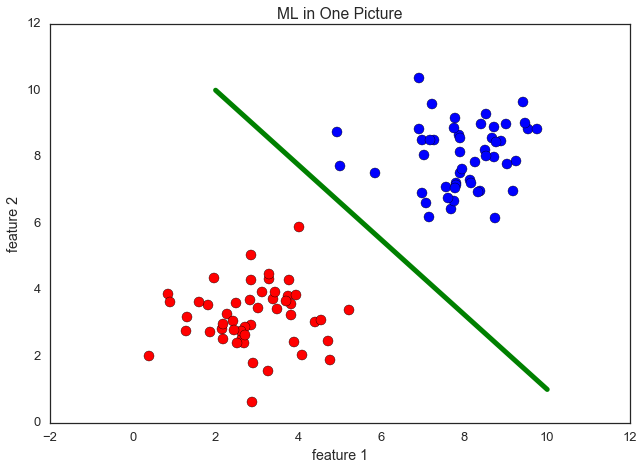

In [3]:
# generate plots for later

# ML in 10 minutes plot
#cheat to get the same "random" numbers
np.random.seed(seed=99)

# make some data up
mean1 = [3,3]
mean2 = [8,8]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
x1 = np.random.multivariate_normal(mean1,cov,50)
x2 = np.random.multivariate_normal(mean2,cov,50)

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

plt.plot([2,10],[10,1], c='g', linewidth=5.0)

plt.title("ML in One Picture")
plt.xlabel("feature 1")
plt.ylabel("feature 2")

fig_ml_in_10 = plt.gcf()

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


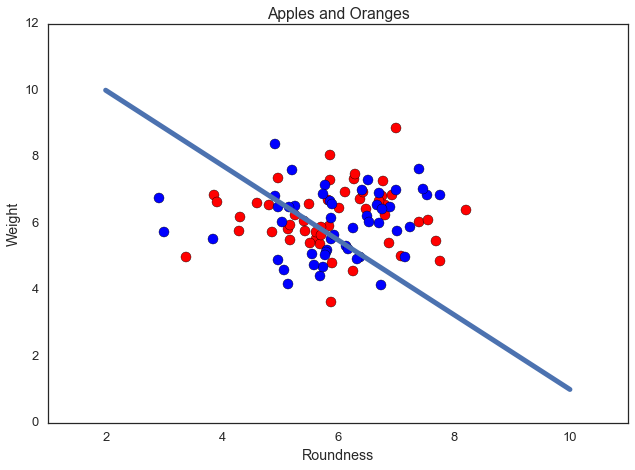

In [4]:
# features matter plot
#cheat to get the same "random" numbers
np.random.seed(seed=99)

# make some data up
mean1 = [6,6]
mean2 = [6,6]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
x1 = np.random.multivariate_normal(mean1,cov,50)
x2 = np.random.multivariate_normal(mean2,cov,50)

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

plt.plot([2,10],[10,1], c='g', linewidth=5.0)

plt.title("Apples and Oranges")
plt.xlabel("Roundness")
plt.ylabel("Weight")

fig_features_matter_confused = plt.gcf()


/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


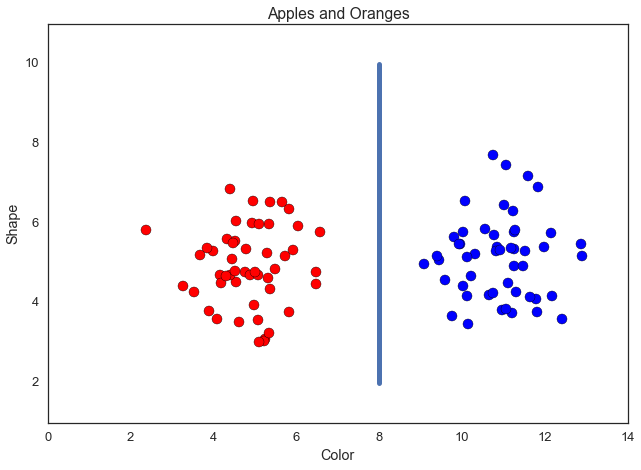

In [5]:
#cheat to get the same "random" numbers
np.random.seed(seed=42)

# make some data up
mean1 = [5,5]
mean2 = [11,5]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
x1 = np.random.multivariate_normal(mean1,cov,50)
x2 = np.random.multivariate_normal(mean2,cov,50)

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)

plt.plot([8,8],[2,10], c='g', linewidth=5.0)

plt.title("Apples and Oranges")
plt.xlabel("Color")
plt.ylabel("Shape")

fig_features_matter_separated = plt.gcf()


/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


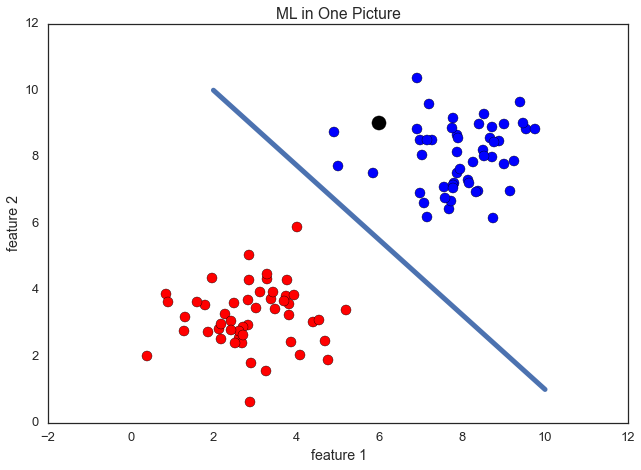

In [6]:
#cheat to get the same "random" numbers
np.random.seed(seed=99)

# make some data up
mean1 = [3,3]
mean2 = [8,8]
cov = [[1.0,0.0],[0.0,1.0]] 

#create some points
x1 = np.random.multivariate_normal(mean1,cov,50)
x2 = np.random.multivariate_normal(mean2,cov,50)

plt.scatter(x1[:,0],x1[:,1], c='r', s=100)
plt.scatter(x2[:,0],x2[:,1], c='b', s=100)
plt.scatter([6],[9], c='k', s=200)

plt.plot([2,10],[10,1], c='g', linewidth=5.0)

plt.title("ML in One Picture")
plt.xlabel("feature 1")
plt.ylabel("feature 2")

fig_prediction = plt.gcf()

CS109
======

Verena Kaynig-Fittkau
---------------------
vkaynig@seas.harvard.edu

staff@cs109.org

Announcements
==============

* HarvardX Interactive Learning Challenge

http://databits.io/challenges

* HW 3 is out

Introduction to Machine Learning
================================

* Analyze training data 

* Make predictions for new data points
    - supervised learning
    - data has labels
    
* Find patterns in the data
    - unsupervised learning
    - data has no labels

Examples for Supervised Learning
=================================

* face detection
* handwritten digit recognition
* sound classification for hearing aids
* spam filtering
* recommender systems


Examples for Unsupervised Learning
==================================

* dimensionality reduction
* cocktail party problem
* fraud detection
* google image search categories

Somewhere in Between
====================

* reinforcement learning
    - flappy bird agent
    http://chrisbeaumont.org/floppybird/
        
* semi-supervised learning
    - music classification

Supervised Learning
===================


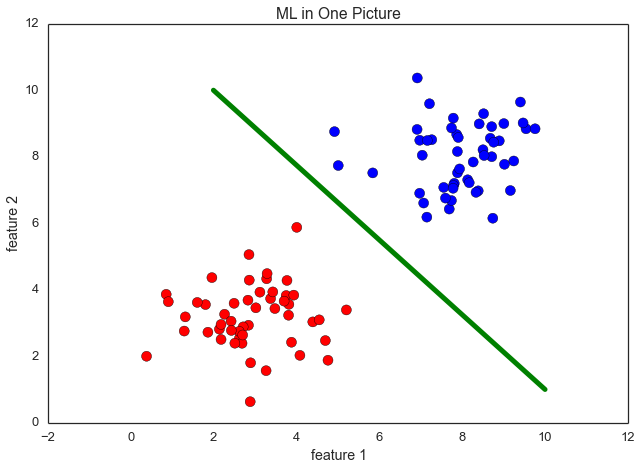

In [7]:
fig_ml_in_10

Features Matter!
================

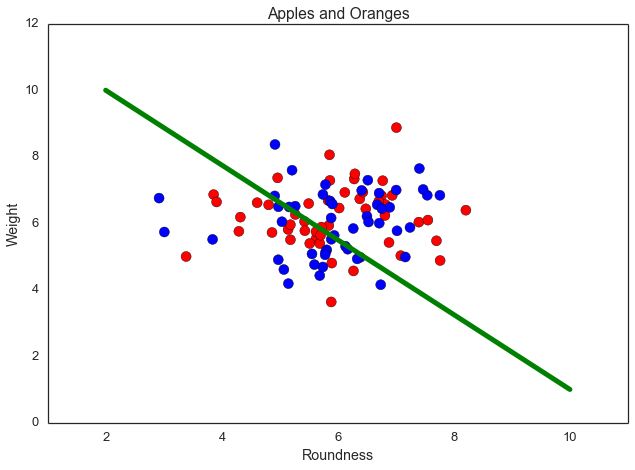

In [8]:
fig_features_matter_confused

Features Matter!
================

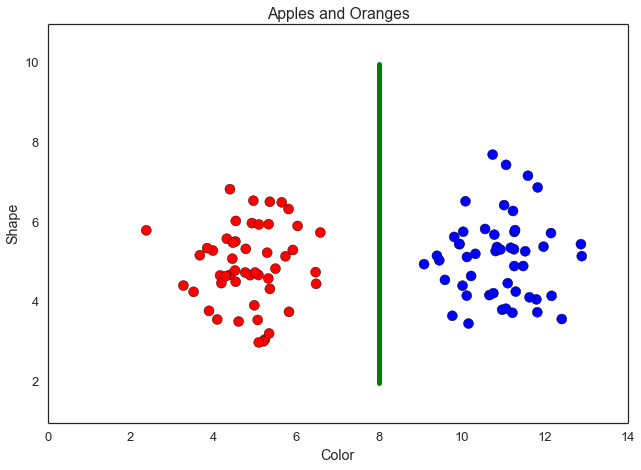

In [9]:
fig_features_matter_separated

Self Driving Car
===============

*  *** What features do you need to drive a car? ***

Self Driving Car
===============

!["Google Car"](http://2.bp.blogspot.com/-DjZR_4wX8Kk/UuSaoWLVJlI/AAAAAAAACYY/84pBrojn3Is/s1600/Cybernewsalerts2.PNG,""Google Car)


Just Measure Everything?
========================

* Data volume

* Computational overhead

* Curse of Dimensionality

Prediction
===========


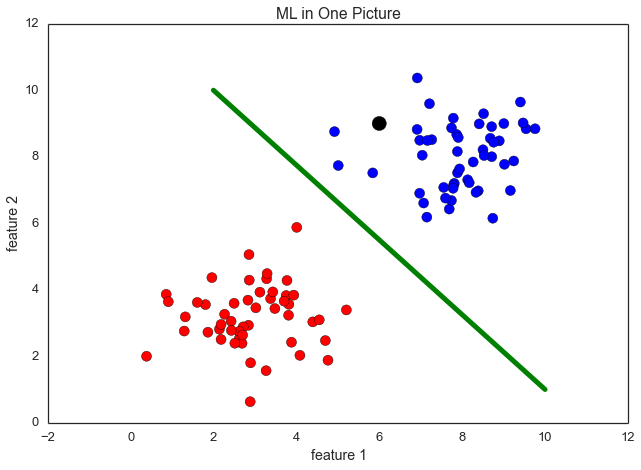

In [10]:
fig_prediction

Naming Conventions
===================

* data points: `x`
* labels: `y`

This is fairly standard in machine learning.

In [7]:
# get the data
x = np.concatenate((x1, x2))

# get the labels
ones = np.ones((50,))
y = np.concatenate((ones*0, ones))

K Nearest Neighbors
===================

* predict class of new data point by majority vote of K nearest neighbors

* very simple
* but good performance


K Nearest Neighbors
====================

<img src="http://upload.wikimedia.org/wikipedia/commons/e/e7/KnnClassification.svg" />

"train" a KNN Classifier
========================

*** Why is this not really training? ***

In [12]:
k = 1 # number of neighbors

classifier = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)
classifier.fit(x,y)

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/sklearn/base.py:175: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  args, varargs, kw, default = inspect.getargspec(init)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_neighbors=1, p=2, weights='uniform')

Predict a Label
===============

In [15]:
newPoint_1

array([6, 9])

[ 1.  0.]


/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


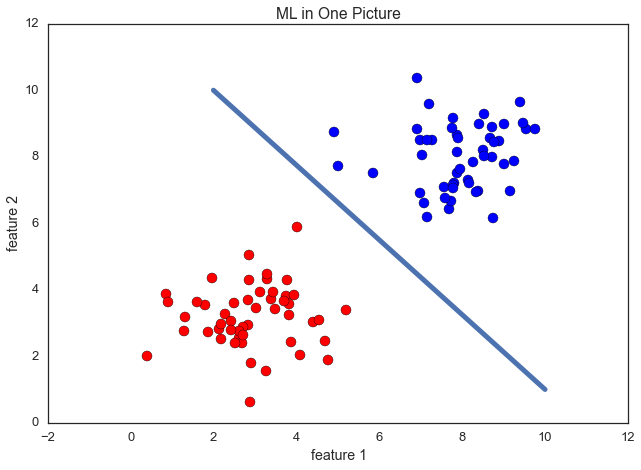

In [14]:
newPoint_1 = np.array([6,9])
newPoint_2 = np.array([2,4])

print(classifier.predict([newPoint_1, newPoint_2]))

fig_ml_in_10

Visualize the Decision Boundary
===============================

In [16]:
# code based on sklearn example
def visualize_decision_boundary(classifier, xmin, xmax, ymin, 
                                ymax, step_size=0.02, 
                                cmap=cmap_light):
    
    xx, yy = np.meshgrid(np.arange(xmin, xmax, step_size),
                         np.arange(ymin, ymax, step_size))
    colors = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    colors = colors.reshape(xx.shape)
    ax = plt.subplot(111)
    ax.pcolormesh(xx, yy, colors, cmap=cmap)
    return ax

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


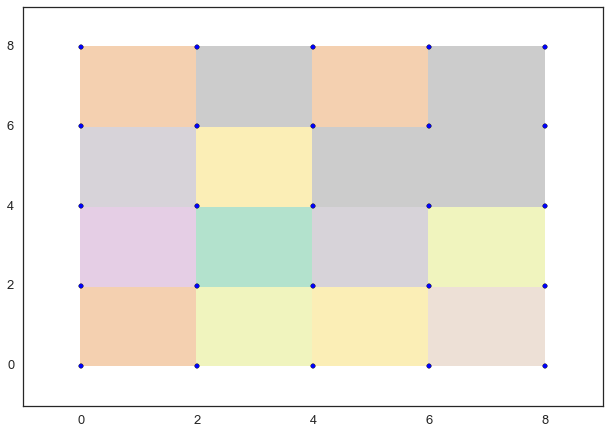

In [17]:
xx, yy = np.meshgrid(np.arange(0, 10, 2),
                     np.arange(0, 10, 2))

plt.scatter(xx,yy, c='b', zorder=2)
random_colors = np.random.randint(10, size=25)
random_colors = random_colors.reshape(xx.shape)
plt.pcolormesh(xx,yy,random_colors,cmap=plt.cm.Pastel2, zorder=1)

/Users/RichardAfolabi/anaconda/envs/python3/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


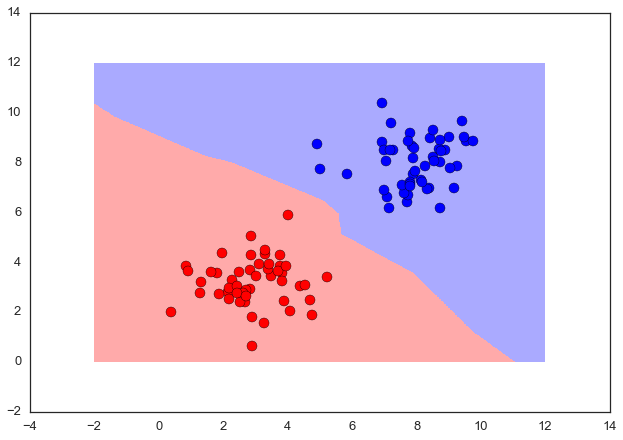

In [18]:
# now visualize the boundary
boundary_vis = visualize_decision_boundary(classifier=classifier, 
                                           xmin=-2,xmax=12,
                                           ymin=0,ymax=12,
                                           step_size=0.02)

# and plot our data points
boundary_vis.scatter(x1[:,0],x1[:,1], c='r', s=100)
boundary_vis.scatter(x2[:,0],x2[:,1], c='b', s=100)
plt.show()

Now with Real Data
==================

In [25]:
data = sklearn.datasets.fetch_mldata('MNIST original')
print( data.keys())

x = data['data'][::50,:]
y = data['target'][::50]

print(x.shape, y.shape)

dict_keys(['data', 'target', 'COL_NAMES', 'DESCR'])
(1400, 784) (1400,)


What Are We Looking At?
=======================

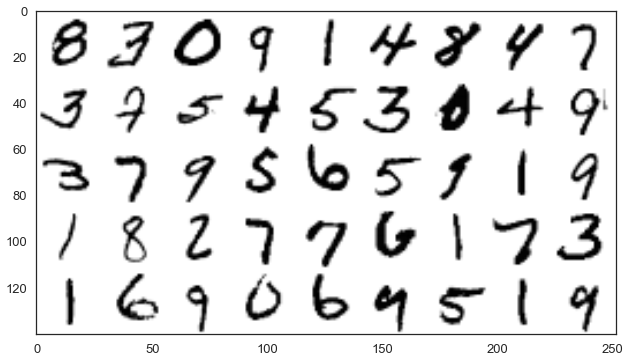

In [27]:
# shuffle the data
randomized_data = np.random.permutation(x)
rows = 5
cols = 10
img = []

for col in np.arange(rows, rows*cols, rows):
    examples = randomized_data[col-rows:col,:]
    col_img = np.reshape(examples,(28*rows,28))
    img.append(col_img)

plt.imshow(np.hstack(img))
plt.show()

Scatter plot
============

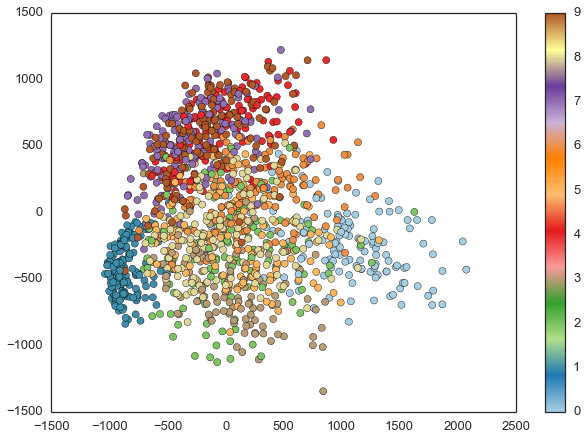

In [41]:
data = sklearn.datasets.fetch_mldata('MNIST original')
x = data['data'][::50,:]
y = data['target'][::50]

svd = sklearn.decomposition.TruncatedSVD(n_components=2)
x = x - np.mean(x, axis=0)
#x = x / (np.std(x, axis=0) + 0.00001)
foo = svd.fit(x)
x_2d = foo.transform(x)

plt.scatter(x_2d[:,0], x_2d[:,1], c=y, s = 50, cmap=plt.cm.Paired)
plt.colorbar()
plt.show()

In [28]:
print foo_c
print "##########"
print pca_c

[[ -9.03875513e-17   3.22866312e-16  -9.26072909e-17 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [ -1.72407198e-16  -1.54383212e-16   2.76140307e-16 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]]
##########
[[ -5.98928482e-21   5.71049496e-19   3.80699664e-19 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  3.36892550e-21  -1.69759848e-19   2.82933081e-20 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


Just Two Classes
================

In [ ]:
x_sub_2d = x_2d[np.logical_or(y==8, y==0),:]
y_sub = y[np.logical_or(y==8, y==0)]

plt.scatter(x_sub_2d[:,0], x_sub_2d[:,1], c=y_sub, 
            s = 50, cmap=plt.cm.Paired)
plt.show()

Effect of K
============

In [ ]:
k = 1
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, 
                                             weights = 'uniform')
knn.fit(x_sub_2d,y_sub)

boundary_vis = visualize_decision_boundary(classifier=knn, 
                                xmin=500, xmax=4000,
                                ymin=-2500,ymax=1500, 
                                step_size=20.0, cmap=plt.cm.Paired)

# and plot our data points
boundary_vis.scatter(x_sub_2d[:,0], x_sub_2d[:,1], 
                     c=y_sub, s = 10, linewidth=1, 
                     cmap=plt.cm.Paired)

fig_knn = plt.gcf()

General Observations
=====================

* For K=1:
    - wiggly decision boundary
    - can be changed by one data point
    - high variance, low bias
    
* For K >> 1:
    - smoother boundary
    - training error > 0
    - low variance, high bias

Discussion:
============

* *** What are strengths and weaknesses of KNN? ***
* *** When would you use it? ***
* *** When would you not use it? ***

How Can We Choose K?
=====================

* best prediction performance
* generalization to unseen data
* need to measure performance

Error Measures
==============

* positive class: 8
* negative class: 0


* true positive (tp)
* true negative (tn)
* false positive (fp)
* false negative (fn)



Confusion Matrix
=================

!["Confusion matrix"](http://3.bp.blogspot.com/-xXYyRNtMlmI/U3EQxjJiWhI/AAAAAAAAAJ0/ieIBaRA46Ro/s1600/Confusion+Matrix.png, "Confusion Matrix")

In [ ]:
k = 20
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, 
                                             weights = 'uniform')
knn.fit(x_sub_2d,y_sub)
y_hat = knn.predict(x_sub_2d)

confusion_matrix = sklearn.metrics.confusion_matrix(y_sub, y_hat)
print confusion_matrix

In [ ]:
# Show confusion matrix in a separate window
def show_confusion_matrix(confusion_matrix):
    plt.matshow(confusion_matrix, cmap=plt.cm.Greys_r)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
show_confusion_matrix(confusion_matrix)


In [ ]:
k = 20
knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, 
                                             weights = 'uniform')
knn.fit(x,y)
y_hat = knn.predict(x)

confusion_matrix = sklearn.metrics.confusion_matrix(y, y_hat)
show_confusion_matrix(confusion_matrix)
print confusion_matrix

Accuracy for Multi Class
========================

$$ \frac{N_{\text{true}}}{N_{\text{all}}} $$

In [ ]:
sklearn.metrics.accuracy_score(y, y_hat, normalize=True)

Evaluate Choice of K
====================

In [ ]:
def accuracy_for_k(k,x,y):
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, 
                                             weights = 'uniform')
    knn.fit(x,y)
    y_hat = knn.predict(x)
    return sklearn.metrics.accuracy_score(y, y_hat, normalize=True)

In [ ]:
## Why is this code inefficient?
acc_values = []
k_values = xrange(1,50,2)
for k in k_values:
    acc_values.append(accuracy_for_k(k=k,x=x_sub_2d,y=y_sub))
    
plt.plot(k_values, acc_values)
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
fig_train_acc = plt.gcf()

Closer Look
===========

* *** Why does the accuracy drop ? ***
* *** Why is this plot meaningless? ***

In [ ]:
fig_train_acc

With Validation Set
===================

In [ ]:
def accuracy_for_k_val(k,x,y, random_state=99):
    split_data = sklearn.cross_validation.train_test_split(
                        x,y, test_size=0.33, random_state=random_state)
    x_train, x_val, y_train, y_val = split_data
    knn = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k, 
                                             weights = 'uniform')
    knn.fit(x_train,y_train)
    y_hat = knn.predict(x_val)
    return sklearn.metrics.accuracy_score(y_val, y_hat, 
                                          normalize=True)

In [ ]:
acc_values_val = []
acc_values_train = []

k_values = xrange(1,150,2)
for k in k_values:
    acc_values_train.append(accuracy_for_k(k=k,x=x_sub_2d,y=y_sub))
    acc_values_val.append(accuracy_for_k_val(k=k,x=x_sub_2d,y=y_sub))
    
plt.plot(k_values, acc_values_train, c='r', label="training accuracy")
plt.plot(k_values, acc_values_val, c='b', label="validation accuracy")
plt.xlabel('Value of k')
plt.ylabel('Accuracy')
plt.legend()

fig_cross_val = plt.gcf()

Overfitting
===========

* worse for flexible models
* model captures noise in training data
* low training error
* high prediction error
* countermeasures:
    - regularization *** - Where is this in KNN? ***
    - cross validation


In [ ]:
fig_knn

Cross Validation
================

* split data into **three** sub-sets
    - train: to train the model
    - validation: to tune hyper-parameters
    - test: to evaluate prediction performance

Cross Validation
================

* *** When do you not need a validation set? ***

* *** Why do we need a train and a validation set? ***

* *** Why do we need an extra test set? ***

* *** Why could Rafael be upset with my plot? ***



In [ ]:
fig_cross_val

Better Cross Validation
=======================

* Measurements without error bars do not exist!
* Split the data multiple times

In [ ]:
k_values = range(1,150,10)

np.random.seed(seed=99)
random_seeds = np.random.randint(1000, size=50)

values = np.zeros((len(k_values),random_seeds.shape[0]))
for k, c_k in zip(k_values, range(len(k_values))):
    counter_rs = 0
    for rs,c_rs in zip(random_seeds, range(random_seeds.shape[0])):
        value = accuracy_for_k_val(k=k,x=x_sub_2d,y=y_sub,
                                   random_state=rs)
        values[c_k,c_rs] = value
        
sns.tsplot(values.T)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

In [ ]:
k_values = range(1,150,10)

np.random.seed(seed=99)
random_seeds = np.random.randint(1000, size=50)

values = np.zeros((len(k_values),random_seeds.shape[0]))
for k, c_k in zip(k_values, range(len(k_values))):
    counter_rs = 0
    for rs,c_rs in zip(random_seeds, range(random_seeds.shape[0])):
        value = accuracy_for_k_val(k=k,x=x_sub_2d,y=y_sub,
                                   random_state=rs)
        values[c_k,c_rs] = value
        
sns.boxplot(values.T)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.show()

K-Fold Cross-Validation
=======================

* split the data randomly
* but into disjunct sets

!["K-Fold CV"](http://www.imtech.res.in/raghava/gpsr/Evaluation_Bioinformatics_Methods_files/image002.jpg)


Classifiers and Invariance
==========================

* digit recognition is
    - translation invariant
    - rotation invariant (a little bit)

Ways to Handle Invariance:
===========================    

* add transformation to training data
* introduce canonical representation
* build into classifier


Rotation Invariance:
====================

!["rotation invariance"](images\digits_rotated.png)

Tangent Space
==============

!["tangent space"](images\tangent_space.png)

KNN works!
===========

http://en.wikipedia.org/wiki/MNIST_database#Classifiers

Elements of Statistical Learning
================================

!["Elements of statistical learning"](http://statweb.stanford.edu/~tibs/ElemStatLearn/CoverII_small.jpg)

Pattern Recognition Class
=========================

* by Fred Hamprecht

* on Youtube

http://www.youtube.com/playlist?list=PLuRaSnb3n4kRDZVU6wxPzGdx1CN12fn0w